- フーリエ変換することで、元の波形を周波数毎に分けることができる
- パワースペクトルは音声を構成する周波数の内訳
  - 時間を考慮せずに周波数に対応する数値としてとらえることができる
  - 音声の特徴をとらえられる

In [23]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy import fftpack

縦軸がdb、横軸が周波数
高音


c:\users\matok\appdata\local\programs\python\python36\lib\site-packages\scipy\fftpack\basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


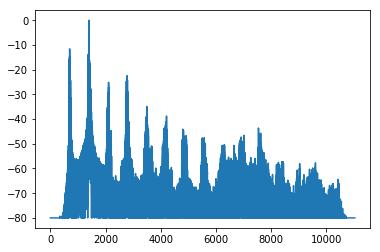

低音


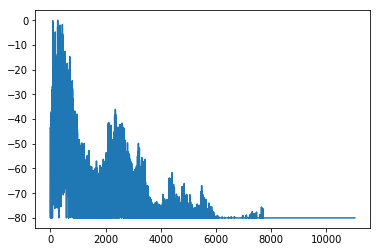

array([-43.57254 , -43.556282, -80.      , ..., -80.      , -80.      ,
       -80.      ], dtype=float32)

In [31]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    fft_wave = fftpack.rfft(a, n=sr)
    fft_freq = fftpack.rfftfreq(n=sr, d=1/sr)
    y = librosa.amplitude_to_db(fft_wave, ref=np.max)
    plt.plot(fft_freq, y)
    plt.show()
    return y

def get_data(dir_name):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path=dir_name)):
        print("read: {}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker], file_name))
    
    return (np.array(data_X), np.array(data_y))

# data_X, data_y = get_data('voiceset')
print('縦軸がdb、横軸が周波数')
print('高音')
get_feat('sample/hi.wav')
print('低音')
get_feat('sample/lo.wav')

In [25]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    fft_wave = fftpack.rfft(a, n=sr)
    fft_freq = fftpack.rfftfreq(n=sr, d=1/sr)
    y = librosa.amplitude_to_db(fft_wave, ref=np.max)
#    plt.plot(fft_freq, y)
#    plt.show()
    return y

def get_data(dir_name):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path=dir_name)):
        print("read: {}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker], file_name))
    
    return (np.array(data_X), np.array(data_y))

data_X, data_y = get_data('voiceset')

read: belevskaya_06_su.wav
read: belevskaya_07_su.wav
read: belevskaya_b01.wav


c:\users\matok\appdata\local\programs\python\python36\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


read: belevskaya_b02.wav
read: belevskaya_b03.wav
read: belevskaya_b04.wav
read: belevskaya_b05.wav
read: belevskaya_b06.wav
read: belevskaya_b07.wav
read: belevskaya_b08_su.wav
read: belevskaya_b09_su.wav
read: belevskaya_b10.wav
read: belevskaya_b11.wav
read: belevskaya_b12.wav
read: belevskaya_b13.wav
read: belevskaya_b14.wav
read: belevskaya_b15.wav
read: belevskaya_b16.wav
read: belevskaya_b17.wav
read: kirishima_04_su.wav
read: kirishima_b01.wav
read: kirishima_b02_su.wav
read: kirishima_b03.wav
read: kirishima_b04.wav
read: kirishima_b05.wav
read: kirishima_b06.wav
read: kirishima_b07.wav
read: kirishima_c01.wav
read: kirishima_c02.wav
read: kirishima_c03.wav
read: kirishima_c04.wav
read: kirishima_c05.wav
read: kirishima_c06.wav
read: kirishima_c07.wav
read: kirishima_c08.wav
read: kirishima_c09.wav
read: suzutsuki_b01.wav
read: suzutsuki_b02.wav
read: suzutsuki_b03.wav
read: suzutsuki_b04.wav
read: suzutsuki_b05.wav
read: suzutsuki_b06.wav
read: suzutsuki_b07.wav
read: suzutsu

In [26]:
# 教師データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=11813)
print("{} -> {}, {}".format(len(data_X), len(train_X), len(test_X)))

48 -> 36, 12


In [27]:
clf = svm.SVC(gamma=0.0001, C=1)
clf.fit(train_X, train_y.T[0])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
ok_count = 0

for X, y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

x file: suzutsuki_b06.wav, actual: 2, expected: 1
x file: kirishima_04_su.wav, actual: 2, expected: 0
x file: kirishima_c01.wav, actual: 2, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
o file: belevskaya_b14.wav, actual: 2, expected: 2
x file: kirishima_b04.wav, actual: 2, expected: 0
x file: suzutsuki_b08.wav, actual: 2, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
x file: suzutsuki_b03.wav, actual: 2, expected: 1
o file: belevskaya_b10.wav, actual: 2, expected: 2
x file: kirishima_b01.wav, actual: 2, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
5/12


In [29]:
clf = svm.SVC(gamma=0.0000001, C=10)
clf.fit(train_X, train_y.T[0])
clf.predict(np.array([test_X[0]]))

ok_count = 0

for X, y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

x file: suzutsuki_b06.wav, actual: 2, expected: 1
x file: kirishima_04_su.wav, actual: 2, expected: 0
o file: kirishima_c01.wav, actual: 0, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
o file: belevskaya_b14.wav, actual: 2, expected: 2
o file: kirishima_b04.wav, actual: 0, expected: 0
o file: suzutsuki_b08.wav, actual: 1, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
o file: suzutsuki_b03.wav, actual: 1, expected: 1
o file: belevskaya_b10.wav, actual: 2, expected: 2
o file: kirishima_b01.wav, actual: 0, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
10/12


In [30]:
# 他のデータでも大丈夫か確認するために
# 教師データとテストデータを分けるときのseedを変えてみる
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=813)
print("{} -> {}, {}".format(len(data_X), len(train_X), len(test_X)))

clf = svm.SVC(gamma=0.0000001, C=10)
clf.fit(train_X, train_y.T[0])
clf.predict(np.array([test_X[0]]))

ok_count = 0

for X, y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

48 -> 36, 12
o file: belevskaya_b11.wav, actual: 2, expected: 2
o file: kirishima_c01.wav, actual: 0, expected: 0
x file: kirishima_c09.wav, actual: 2, expected: 0
x file: kirishima_04_su.wav, actual: 2, expected: 0
o file: belevskaya_b14.wav, actual: 2, expected: 2
o file: kirishima_b07.wav, actual: 0, expected: 0
x file: suzutsuki_b06.wav, actual: 2, expected: 1
x file: kirishima_c02.wav, actual: 2, expected: 0
o file: kirishima_b03.wav, actual: 0, expected: 0
o file: suzutsuki_b08.wav, actual: 1, expected: 1
o file: suzutsuki_b02.wav, actual: 1, expected: 1
o file: kirishima_b05.wav, actual: 0, expected: 0
8/12


"su" がついたファイルは授業以外の声なのでトーンが違うため誤分類されているのかもしれない